In [2]:
import xlrd
import pandas as pd
import geopandas
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
mlp.rcParams['figure.figsize'] = [8.0, 8.0]

In [2]:
nombres_d = """ALTA VERAPAZ
BAJA VERAPAZ
CHIMALTENANGO
CHIQUIMULA
EL PROGRESO
ESCUINTLA
GUAT. CENTRAL
GUAT. SUR
GUAT. NOROCC.
GUAT. NORORI
HUEHUETENANGO
IXCAN
IXIL
IZABAL
JALAPA
JUTIAPA
PETEN NORTE
PETEN SUROCC
PETEN SURORIE
QUETZALTENANGO
QUICHE
RETALHULEU
SACATEPEQUEZ
SAN MARCOS
SANTA ROSA
SOLOLA
SUCHITEPEQUEZ
TOTONICAPAN
ZACAPA"""
departments = pd.DataFrame(index = nombres_d.split("\n"), data = [16,15,4,
20,2,5,1,1,1,1,13,14,14,18,21,22,17,17,17,9,14,11,3,12,6,7,10,8,19
], columns = ["code_dept"])
departments

,code_dept
ALTA VERAPAZ,16
BAJA VERAPAZ,15
CHIMALTENANGO,4
CHIQUIMULA,20
EL PROGRESO,2
ESCUINTLA,5
GUAT. CENTRAL,1
GUAT. SUR,1
GUAT. NOROCC.,1
GUAT. NORORI,1


In [3]:
files = [
    ("Distribucion de medicamentos 2013.xlsx", 2013),
    ("Distribucion de medicamentos 2014.xlsx", 2014),
    ("Distribucion de medicamentos 2015.xlsx", 2015),
    ("Distribucion de medicamentos 2016.xls", 2016),
    ("Distribucion de medicamentos ene- oct 2017.xls", 2017)
]
basedir = "../Outcome Measurement Data/TUBERCULOSIS/"

In [4]:
data = []

In [5]:
for file, year in files:
    distr = xlrd.open_workbook(basedir + file)
    print("Reading file ", file)
    last_sheet = distr.sheets()[-1]
    status = "Reading"
    program = ""
    product = ""
    supplier = ""
    for i in range(0, last_sheet.nrows):
        if last_sheet.cell_value(i, 0).strip().lower().startswith("informe"): 
            status = "ProcInforme"
            program = last_sheet.cell_value(i+3, 2)
            product = last_sheet.cell_value(i+4, 2)
            supplier = last_sheet.cell_value(i+5, 2)
        if status == "ProcInforme":
            if last_sheet.cell_value(i, 0).strip().lower().startswith("area"):
                p1 = (i, 0)
            if last_sheet.cell_value(i, 0).strip().lower().startswith("total"):
                p2 = (i, 13)
                for x in range(p1[0]+1, p2[0]):
                    for y in range(p1[1]+1, p2[1]):
                        data.append(
                            [
                                program, product, supplier, last_sheet.cell_value(x, 0), year,
                                y, last_sheet.cell_value(x, y), "DAS"
                            ]
                        )
                for x in range(14, 26):
                    data.append(
                            [
                                program, product, supplier, "GUAT. CENTRAL", year,
                                x-13, last_sheet.cell_value(p1[0]+7, x), "Hospital"
                            ]
                        )
                status = "Reading"
                program = ""
                product = ""
                supplier = ""


Reading file  Distribucion de medicamentos 2013.xlsx
Reading file  Distribucion de medicamentos 2014.xlsx
Reading file  Distribucion de medicamentos 2015.xlsx
Reading file  Distribucion de medicamentos 2016.xls
Reading file  Distribucion de medicamentos ene- oct 2017.xls


In [6]:
TBSupplyData = pd.DataFrame(data = data, columns= ["Program", "Product", "Supplier", "Department", "Year", "Month", "Amount", "Recipient"])

In [8]:
def tofloat(i):
    try:
        return float(i)
    except: 
        print("Bad value", i)
        return np.NAN
TBSupplyData.Amount = TBSupplyData.Amount.map(tofloat)

Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 
Bad value 

In [9]:
TBSupplyData[TBSupplyData.Amount>1000]

,Program,Product,Supplier,Department,Year,Month,Amount,Recipient
1,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,2,2740.0,DAS
4,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,5,3376.0,DAS
5,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,6,3272.0,DAS
6,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,7,2990.0,DAS
9,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,10,2864.0,DAS
10,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,11,2864.0,DAS
17,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",BAJA VERAPAZ,2013,6,1150.0,DAS
18,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",BAJA VERAPAZ,2013,7,1610.0,DAS
33,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",CHIMALTENANGO,2013,10,1432.0,DAS
40,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",CHIQUIMULA,2013,5,1585.0,DAS


In [12]:
products = TBSupplyData.Product.value_counts()
products

KANAMICINA, VIAL DE 1 GRAMO                                  1800
ISONIAZIDA, TABLETA DE 100 MG.                               1800
LEVOFLOXACINA, COMPRIMIDO DE 250 MG.                         1800
RIFAMPICINA SUSPENSION 100MG/5ML., FRASCO DE 120 ML.         1800
ETAMBUTOL, TABLETA DE 400 MG.                                1800
ETHIONAMIDA, COMPRIMIDO DE 250 MG.                           1800
CLOFAZIMINE, CAPSULA DE 50 MG.                               1440
ISONIAZIDA, TAB LETA DE 300 MG.                              1440
PIRAZINAMIDA, TABLET DE 500 MG.                              1440
RIFAMPICINA, TABLETA DE 300 MG.                              1080
MOXIFLOXACINA, TABLETA DE 400 MG.                            1080
CICLOCERINA, CAPSULA DE 250 MG.                              1080
AMOXICILINA/ACIDO CLAVULANICO, COMPRIMIDO DE 875MG/125MG.    1080
TUBERCULINA, VIAL PPD 2 T.U. 1 ML.                            720
RIFAMPICINA, CAPSULA DE 300 MG.                               720
ESTREPTOMI

In [14]:
# The following data frame was built from the output of the prevous command. 
# This may need to be updated if the data has other medicines names and quantities.
original_text = """ISONIAZIDA, TABLETA DE 100 MG.
ETAMBUTOL, TABLETA DE 400 MG.
ETHIONAMIDA, COMPRIMIDO DE 250 MG.
LEVOFLOXACINA, COMPRIMIDO DE 250 MG.
RIFAMPICINA SUSPENSION 100MG/5ML., FRASCO DE 120 ML.
KANAMICINA, VIAL DE 1 GRAMO
PIRAZINAMIDA, TABLET DE 500 MG.
CLOFAZIMINE, CAPSULA DE 50 MG.
ISONIAZIDA, TAB LETA DE 300 MG.
RIFAMPICINA, TABLETA DE 300 MG.
CICLOCERINA, CAPSULA DE 250 MG.
MOXIFLOXACINA, TABLETA DE 400 MG.
AMOXICILINA/ACIDO CLAVULANICO, COMPRIMIDO DE 875MG/125MG.
TUBERCULINA, VIAL PPD 2 T.U. 1 ML.
RIFAMPICINA, CAPSULA DE 300 MG.
TUBERCULINA, VIAL PPD 2 T.U. 1.5 ML.
ESTREPTOMICINA, VIAL/FRSCO DE 1 GRAMO
CICLOSERINA, CAPSULA DE 250 MG.
IMIPENEM/CILASTATINA 1 GRAMOS
ESTREPTOMICINA, VIAL/FRASCO DE 1 GRAMO
ACIDO PARAAMINOSALICILICO SOBRE DE 4 GRAMOS
TUBERCULINA, VIAL PPD 5 T.U. 1 ML.
PIRAZINAMIDA, TABLETA DE 500 MG.
ISONIAZIDA, TABLETA DE 300 MG.
CAPREOMICINA VIAL 1 G
LINEZOLID 600 MG TABLETA"""
mg_data = """100
400
250
250
2400
1000
500
50
300
300
250
400
1000
0
300
0
1000
250
1000
1000
4000
0
500
300
1000
600"""
ml_data = """0
0
0
0
120
0
0
0
0
0
0
0
0
1
0
1.5
0
0
0
0
0
1
0
0
0
0"""
nombres = """ISONIAZIDA
ETAMBUTOL
ETHIONAMIDA
LEVOFLOXACINA
RIFAMPICINA
KANAMICINA
PIRAZINAMIDA
CLOFAZIMINE
ISONIAZIDA
RIFAMPICINA
CICLOCERINA
MOXIFLOXACINA
AMOXICILINA/ACIDO CLAVULANICO
TUBERCULINA
RIFAMPICINA
TUBERCULINA
ESTREPTOMICINA
CICLOSERINA
IMIPENEM/CILASTATINA
ESTREPTOMICINA
ACIDO PARAAMINOSALICILICO
TUBERCULINA
PIRAZINAMIDA
ISONIAZIDA
CAPREOMICINA
LINEZOLID"""
products = pd.DataFrame(index = original_text.split("\n"))
products["MG"] = str.split(mg_data, "\n")
products["Medicine"] = nombres.split("\n")
products["ML"] = ml_data.split("\n")

In [15]:
products

,MG,Medicine,ML
"ISONIAZIDA, TABLETA DE 100 MG.",100,ISONIAZIDA,0
"ETAMBUTOL, TABLETA DE 400 MG.",400,ETAMBUTOL,0
"ETHIONAMIDA, COMPRIMIDO DE 250 MG.",250,ETHIONAMIDA,0
"LEVOFLOXACINA, COMPRIMIDO DE 250 MG.",250,LEVOFLOXACINA,0
"RIFAMPICINA SUSPENSION 100MG/5ML., FRASCO DE 120 ML.",2400,RIFAMPICINA,120
"KANAMICINA, VIAL DE 1 GRAMO",1000,KANAMICINA,0
"PIRAZINAMIDA, TABLET DE 500 MG.",500,PIRAZINAMIDA,0
"CLOFAZIMINE, CAPSULA DE 50 MG.",50,CLOFAZIMINE,0
"ISONIAZIDA, TAB LETA DE 300 MG.",300,ISONIAZIDA,0
"RIFAMPICINA, TABLETA DE 300 MG.",300,RIFAMPICINA,0


In [16]:
TBSupplyData = TBSupplyData.merge(products, how="outer", left_on = "Product", right_index=True)

In [17]:
TBSupplyData = TBSupplyData.merge(departments, how="outer", left_on = "Department", right_index=True)

In [18]:
TBSupplyData

,Program,Product,Supplier,Department,Year,Month,Amount,Recipient,MG,Medicine,ML,code_dept
0,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,1,0.0,DAS,300,ISONIAZIDA,0,16
1,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,2,2740.0,DAS,300,ISONIAZIDA,0,16
2,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,3,0.0,DAS,300,ISONIAZIDA,0,16
3,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,4,0.0,DAS,300,ISONIAZIDA,0,16
4,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,5,3376.0,DAS,300,ISONIAZIDA,0,16
5,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,6,3272.0,DAS,300,ISONIAZIDA,0,16
6,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,7,2990.0,DAS,300,ISONIAZIDA,0,16
7,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,8,0.0,DAS,300,ISONIAZIDA,0,16
8,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,9,0.0,DAS,300,ISONIAZIDA,0,16
9,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,10,2864.0,DAS,300,ISONIAZIDA,0,16


In [8]:
# TBSupplyData = pd.read_csv(basedir + "GTM-TB-distribution-2013-2017.csv")
# del TBSupplyData["Unnamed: 0"]

In [19]:
drugclass = pd.DataFrame(data = [
    ["RIFAMPICINA", "FIRSTLINE"],
    ["ISONIAZIDA", "FIRSTLINE"],
    ["ETHIONAMIDA", "SECONDLINE"],
    ["PIRAZINAMIDA", "FIRSTLINE"],
    ["TUBERCULINA", "DX"],
    ["KANAMICINA", "SECONDLINE"],
    ["LEVOFLOXACINA", "SECONDLINE"],
    ["ETAMBUTOL", "FIRSTLINE"],
    ["CLOFAZIMINE", "SECONDLINE"],
    ["AMOXICILINA/ACIDO CLAVULANICO", "MDR"],
    ["CICLOCERINA", "SECONDLINE"],
    ["ESTREPTOMICINA", "FIRSTLINE"],
    ["MOXIFLOXACINA", "SECONDLINE"],
    ["ACIDO PARAAMINOSALICILICO", "SECONDLINE"],
    ["CAPREOMICINA", "SECONDLINE"],
    ["LINEZOLID", "SECONDLINE"],
    ["IMIPENEM/CILASTATINA", "MDR"]
], columns= ["drug", "class"])

TBSupplyData = TBSupplyData.merge(drugclass, left_on="Medicine", right_on = "drug", how="outer")

In [21]:
TBSupplyData[lambda x: x.Recipient == "Hospital"]

,Program,Product,Supplier,Department,Year,Month,Amount,Recipient,MG,Medicine,ML,code_dept,drug,class
732,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,1,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
733,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,2,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
734,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,3,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
735,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,4,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
736,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,5,5000.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
737,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,6,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
738,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,7,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
739,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,8,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
740,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,9,230.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE
741,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",GUAT. CENTRAL,2013,10,0.0,Hospital,300,ISONIAZIDA,0,1,ISONIAZIDA,FIRSTLINE


In [20]:
TBSupplyData.to_csv(basedir + "GTM-TB-distribution-2013-2017.csv")

In [7]:
TBSupplyData = pd.read_csv(basedir + "GTM-TB-distribution-2013-2017.csv")

([<matplotlib.axis.XTick at 0xad47978>,
 <a list of 4 Text xticklabel objects>)

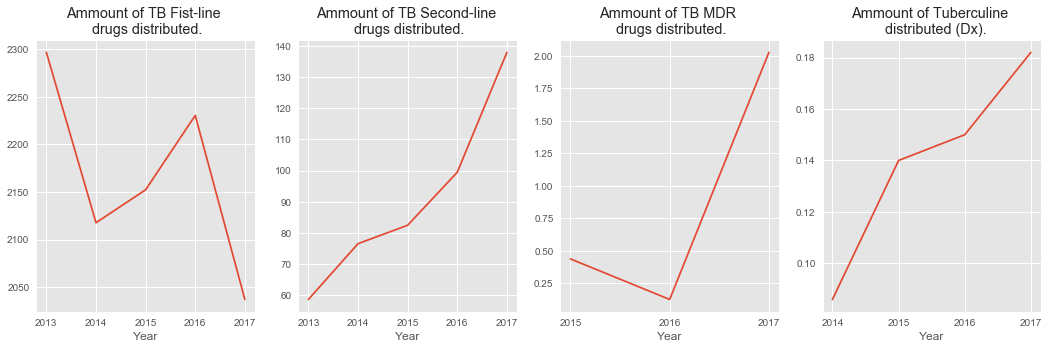

In [5]:
mlp.rcParams['figure.figsize'] = [18.0, 5.0]

plt.subplot(1,4, 1)

plotData = TBSupplyData[lambda x: x["class"] == "FIRSTLINE"].groupby(["Year"]).Ammount.sum()
plt.plot(plotData.index, plotData.values/1000)
plt.title("Ammount of TB Fist-line \n drugs distributed.")
plt.xlabel("Year")
plt.xticks(plotData.index)


plt.subplot(1,4, 2)

plotData = TBSupplyData[lambda x: x["class"] == "SECONDLINE"].groupby(["Year"]).Ammount.sum()
plt.plot(plotData.index, plotData.values/1000)
plt.title("Ammount of TB Second-line \n drugs distributed.")
plt.xlabel("Year")
plt.xticks(plotData.index)


plt.subplot(1,4, 3)

plotData = TBSupplyData[lambda x: x["class"] == "MDR"].groupby(["Year"]).Ammount.sum()
plt.plot(plotData.index, plotData.values/1000)
plt.title("Ammount of TB MDR \n drugs distributed.")

plt.xlabel("Year")
plt.xticks(plotData.index)

plt.subplot(1,4, 4)

plotData = TBSupplyData[lambda x: x["class"] == "DX"].groupby(["Year"]).Ammount.sum()
plt.plot(plotData.index, plotData.values/1000)
plt.title("Ammount of Tuberculine \n  distributed (Dx).")

plt.xlabel("Year")
plt.xticks(plotData.index)

In [53]:
TBSupplyData.groupby(["Year", "class"]).Ammount.sum()

Year  class     
2013  FIRSTLINE     2296637.0
      SECONDLINE      58722.0
2014  DX                 86.0
      FIRSTLINE     2117654.0
      SECONDLINE      76577.0
2015  DX                140.0
      FIRSTLINE     2152270.0
      MDR               438.0
      SECONDLINE      82480.0
2016  DX                150.0
      FIRSTLINE     2230427.0
      MDR               126.0
      SECONDLINE      99450.0
2017  DX                182.0
      FIRSTLINE     2037072.0
      MDR              2027.0
      SECONDLINE     137840.0
Name: Ammount, dtype: float64

In [6]:
deptos = geopandas.read_file("../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")

In [17]:
plotData = TBSupplyData[lambda x: (x.Year == 2017)].groupby(["code_dept", "class"]).Ammount.sum().reset_index()
plotData.code_dept = (plotData.code_dept*100).apply(lambda x: str(x))


Text(0.5,1,'Tuberculine (Diagnosis) distribution')

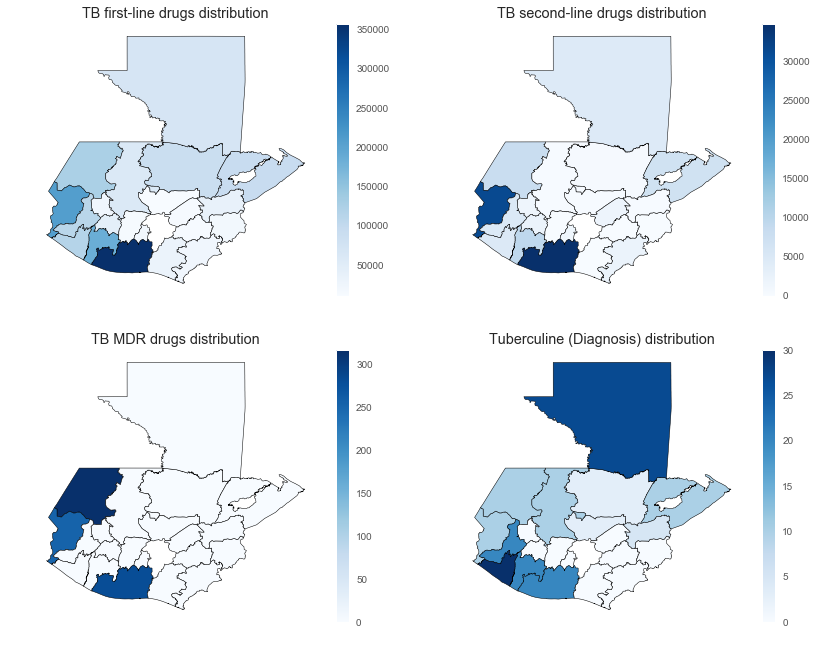

In [80]:
f, ax = plt.subplots(2, 2, figsize=(14, 11))

args = {"edgecolor": "black"}
deptos.merge(plotData[plotData["class"]=="FIRSTLINE"], 
             left_on="CODIGO", right_on = "code_dept" ).plot("Ammount", cmap = "Blues", legend=True, 
                                                            ax = ax[0][0], **args)

ax[0][0].axis('off')
ax[0][0].set_title("TB first-line drugs distribution")

deptos.merge(plotData[plotData["class"]=="SECONDLINE"], 
             left_on="CODIGO", right_on = "code_dept" ).plot("Ammount", cmap = "Blues",  legend=True, 
                                                            ax = ax[0][1], **args)
ax[0][1].axis('off')
ax[0][1].set_title("TB second-line drugs distribution")

deptos.merge(plotData[plotData["class"]=="MDR"], 
             left_on="CODIGO", right_on = "code_dept" ).plot("Ammount", cmap = "Blues", legend=True, 
                                                            ax = ax[1][0], **args)
ax[1][0].axis('off')
ax[1][0].set_title("TB MDR drugs distribution")

deptos.merge(plotData[plotData["class"]=="DX"], 
             left_on="CODIGO", right_on = "code_dept" ).plot("Ammount", cmap = "Blues", legend=True, 
                                                            ax = ax[1][1], **args)
ax[1][1].axis('off')
ax[1][1].set_title("Tuberculine (Diagnosis) distribution")

#geopandas.GeoDataFrame.plot()
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, 
# Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r,
# Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, 
# PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, 
# RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, 
# YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, 
# bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
# cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r,